Inference Examples

Needed packages

library(dplyr)
library(ggplot2)
library(infer)
library(knitr)
library(kableExtra)
library(readr)
library(janitor)

One mean

 Problem statement
The National Survey of Family Growth conducted by the Centers for Disease Control gathers information on family life, marriage and divorce, pregnancy, infertility, use of contraception, and men’s and women’s health. One of the variables collected on this survey is the age at first marriage. 5,534 randomly sampled US women between 2006 and 2010 completed the survey. The women sampled here had been married at least once. Do we have evidence that the mean age of first marriage for all US women from 2006 to 2010 is greater than 23 years? (Tweaked a bit from Diez, Barr, and Çetinkaya-Rundel 2014 

 Competing hypotheses
In words
Null hypothesis: The mean age of first marriage for all US women from 2006 to 2010 is equal to 23 years.

Alternative hypothesis: The mean age of first marriage for all US women from 2006 to 2010 is greater than 23 years.

Set α  
It’s important to set the significance level before starting the testing using the data. Let’s set the significance level at 5% here.

Exploring the sample data

In [2]:
library(tidyverse)
library(moderndive)
library(infer)


Warning message:
"package 'tidyverse' was built under R version 3.5.3"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.0     v purrr   0.2.5
v tibble  2.1.1     v dplyr   0.8.3
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.5.3"Warning message:
"package 'tibble' was built under R version 3.5.3"Warning message:
"package 'tidyr' was built under R version 3.5.3"Warning message:
"package 'readr' was built under R version 3.5.3"Warning message:
"package 'dplyr' was built under R version 3.5.3"Warning message:
"package 'stringr' was built under R version 3.5.3"Warning message:
"package 'forcats' was built under R version 3.5.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'moderndive' was built under R version 3.5.3"Warning

In [3]:
library(readr)
age_at_marriage <- read_csv("https://moderndive.com/data/ageAtMar.csv")

Parsed with column specification:
cols(
  age = col_double()
)


In [4]:
library(dplyr)
library(magrittr)
library(kableExtra)
age_summ <- age_at_marriage %>%  summarize(sample_size = n(),
    mean = mean(age),
    sd = sd(age),
    minimum = min(age),
    lower_quartile = quantile(age, 0.25),
    median = median(age),
    upper_quartile = quantile(age, 0.75),
    max = max(age))
kable(age_summ) %>% 
  kable_styling(font_size = ifelse(knitr:::is_latex_output(), 10, 16), 
                latex_options = c("HOLD_position"))
age_summ

Warning message:
"package 'magrittr' was built under R version 3.5.3"
Attaching package: 'magrittr'

The following object is masked from 'package:purrr':

    set_names

The following object is masked from 'package:tidyr':

    extract

Warning message:
"package 'kableExtra' was built under R version 3.5.3"
Attaching package: 'kableExtra'

The following object is masked from 'package:dplyr':

    group_rows



<table class="table" style="font-size: 16px; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:right;"> sample_size </th>
   <th style="text-align:right;"> mean </th>
   <th style="text-align:right;"> sd </th>
   <th style="text-align:right;"> minimum </th>
   <th style="text-align:right;"> lower_quartile </th>
   <th style="text-align:right;"> median </th>
   <th style="text-align:right;"> upper_quartile </th>
   <th style="text-align:right;"> max </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:right;"> 5534 </td>
   <td style="text-align:right;"> 23.44019 </td>
   <td style="text-align:right;"> 4.721365 </td>
   <td style="text-align:right;"> 10 </td>
   <td style="text-align:right;"> 20 </td>
   <td style="text-align:right;"> 23 </td>
   <td style="text-align:right;"> 26 </td>
   <td style="text-align:right;"> 43 </td>
  </tr>
</tbody>
</table>

sample_size,mean,sd,minimum,lower_quartile,median,upper_quartile,max
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5534,23.44019,4.721365,10,20,23,26,43


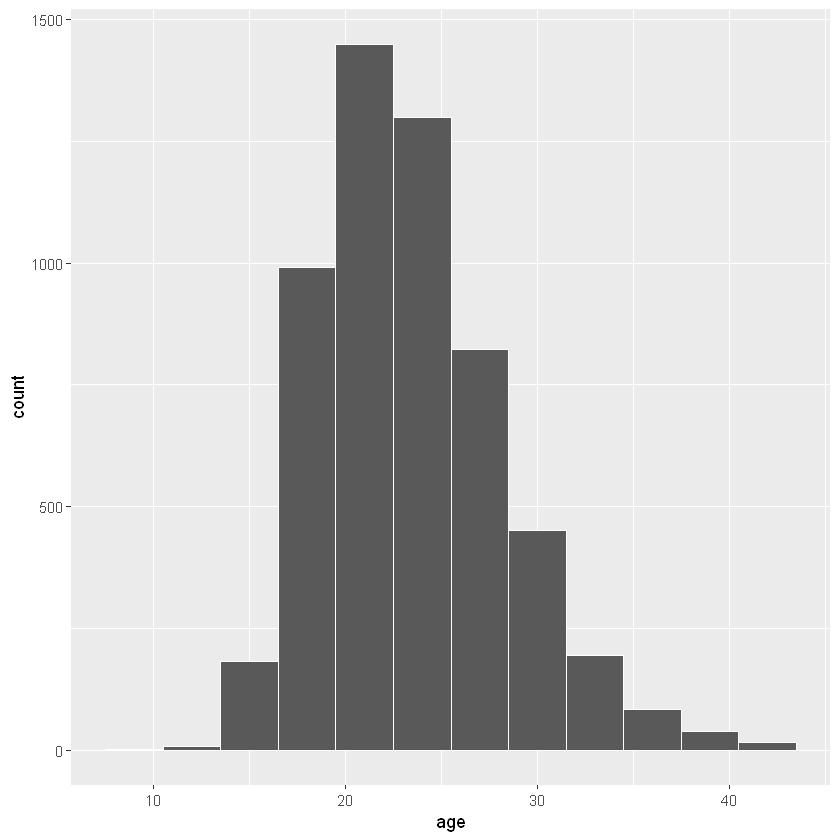

In [5]:
library(ggplot2)
ggplot(data = age_at_marriage, mapping = aes(x = age)) +
  geom_histogram(binwidth = 3, color = "white")

The observed statistic of interest here is the sample mean:

In [6]:
library(dplyr)
x_bar <- age_at_marriage %>% 
  specify(response = age) %>% 
  calculate(stat = "mean")
x_bar

stat
<dbl>
23.44019


Guess about statistical significance
We are looking to see if the observed sample mean of 23.44 is statistically greater than μ 0 = 23
 . They seem to be quite close, but we have a large sample size here. Let’s guess that the large sample size will lead us to reject this practically small difference.

 Non-traditional methods

Bootstrapping for hypothesis test

In [7]:
set.seed(2018)
null_distn_one_mean <- age_at_marriage %>% 
  specify(response = age) %>% 
  hypothesize(null = "point", mu = 23) %>% 
  generate(reps = 10000) %>% 
  calculate(stat = "mean")

Setting `type = "bootstrap"` in `generate()`.


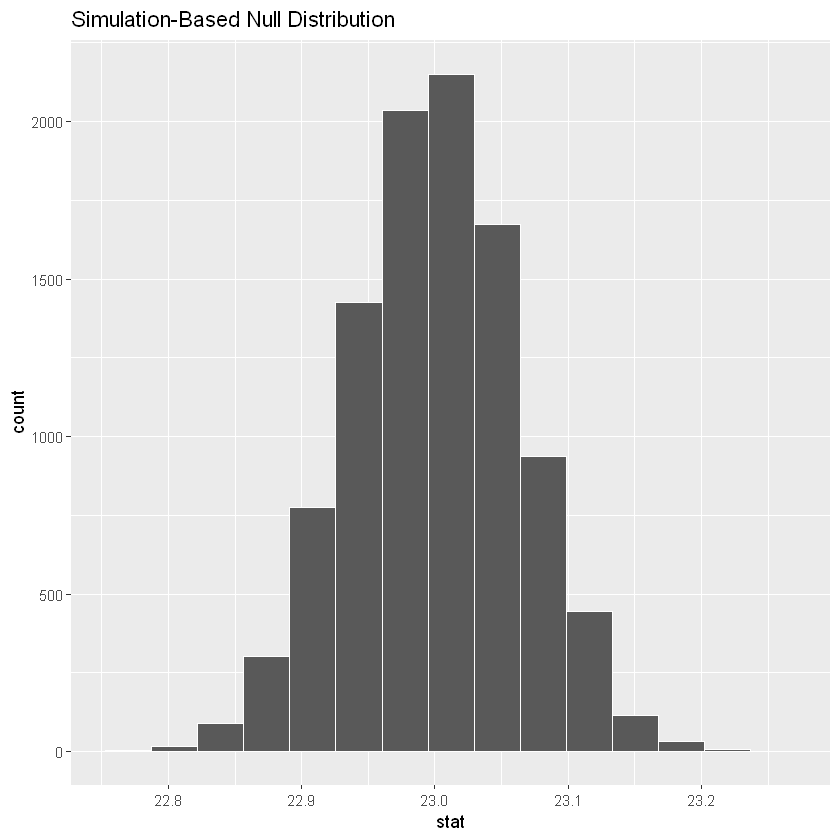

In [8]:
null_distn_one_mean %>% visualize()

Warning message:
"`visualize()` shouldn't be used to plot p-value. Arguments `obs_stat`, `obs_stat_color`, `pvalue_fill`, and `direction` are deprecated. Use `shade_p_value()` instead."

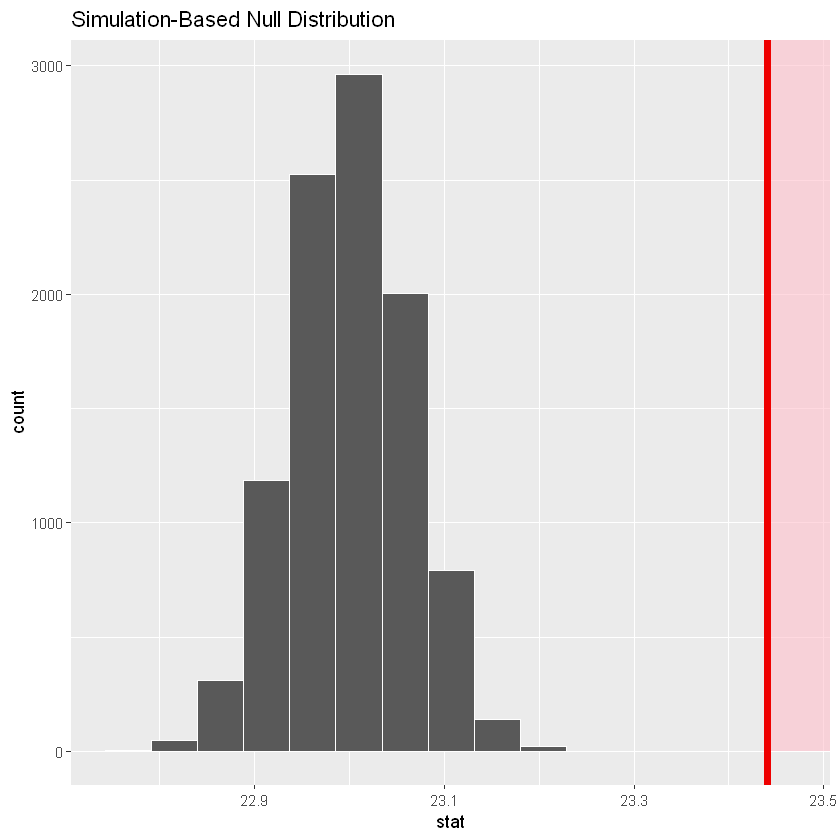

In [9]:
null_distn_one_mean %>%
  visualize(obs_stat = x_bar, direction = "greater")

Calculate p  -value

In [10]:
pvalue <- null_distn_one_mean %>%
  get_pvalue(obs_stat = x_bar, direction = "greater")
pvalue

p_value
<dbl>
0


So our p  -value is 0 and we reject the null hypothesis at the 5% level. You can also see this from the histogram above that we are far into the tail of the null distribution.

Bootstrapping for confidence interval

In [11]:
boot_distn_one_mean <- age_at_marriage %>% 
  specify(response = age) %>% 
  generate(reps = 10000) %>% 
  calculate(stat = "mean")

Setting `type = "bootstrap"` in `generate()`.


In [12]:
ci <- boot_distn_one_mean %>% 
  get_ci()
ci

2.5%,97.5%
<dbl>,<dbl>
23.31587,23.56505


Warning message:
"`visualize()` shouldn't be used to plot confidence interval. Arguments `endpoints`, `endpoints_color`, and `ci_fill` are deprecated. Use `shade_confidence_interval()` instead."

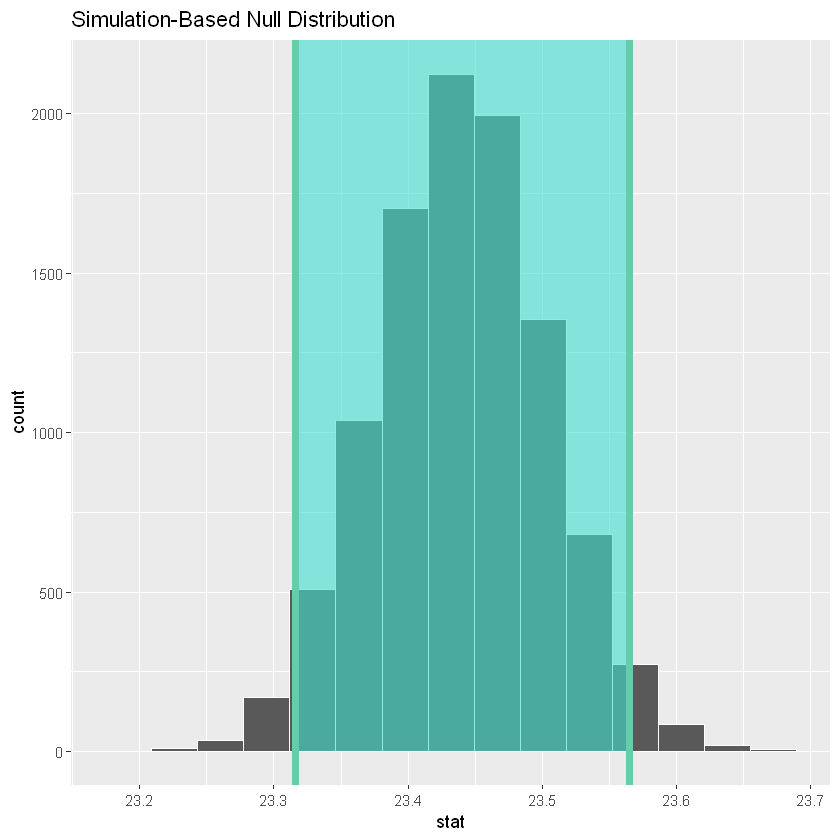

In [13]:
boot_distn_one_mean %>% 
  visualize(endpoints = ci, direction = "between")

Interpretation: We are 95% confident the true mean age of first marriage for all US women from 2006 to 2010 is between 23.316 and 23.565.

Traditional methods


Check conditions
Remember that in order to use the shortcut (formula-based, theoretical) approach, we need to check that some conditions are met.

Independent observations: The observations are collected independently.

The cases are selected independently through random sampling so this condition is met.

Approximately normal: The distribution of the response variable should be normal or the sample size should be at least 30.

The histogram for the sample above does show some skew.

The Q-Q plot below also shows some skew

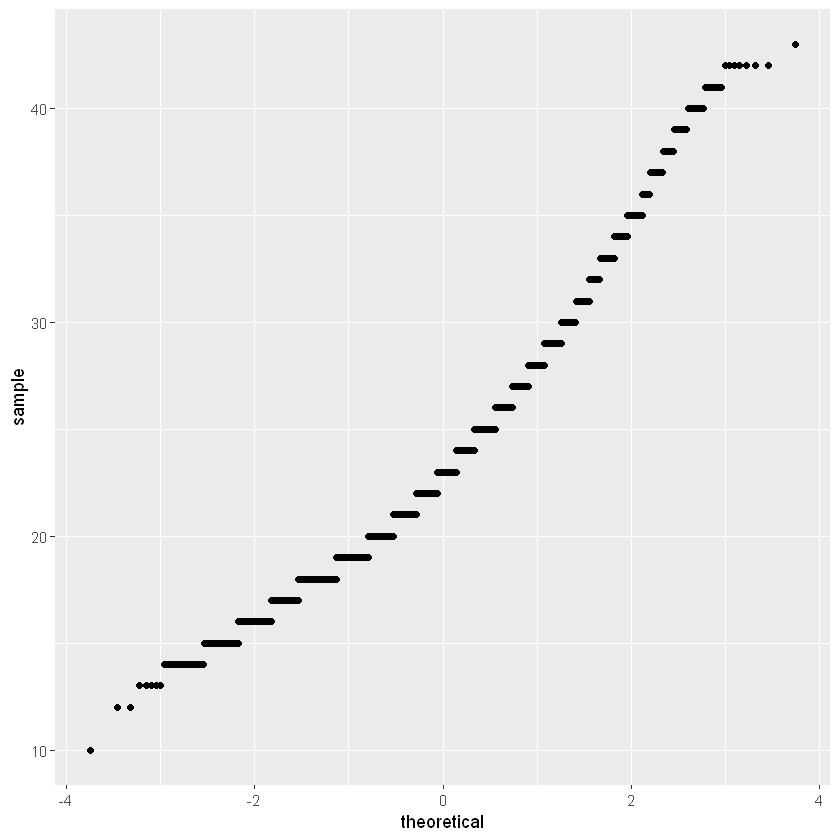

In [14]:
ggplot(data = age_at_marriage, mapping = aes(sample = age)) +
  stat_qq()

Observed test statistic

In [15]:
t_test_results <- age_at_marriage %>% 
  infer::t_test(formula = age ~ NULL,
       alternative = "greater",
       mu = 23)
t_test_results

statistic,t_df,p_value,alternative,lower_ci,upper_ci
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
6.935697,5533,2.252162e-12,greater,23.33578,Inf


We see here that the to b s value is 6.936.

Compute p -value
The p  -value—the probability of observing an to b s value of 6.936 or more in our null distribution of a  
t with 5533 degrees of freedom—is essentially 0.

State conclusion
We, therefore, have sufficient evidence to reject the null hypothesis. Our initial guess that our observed sample mean was statistically greater than the hypothesized mean has supporting evidence here. Based on this sample, we have evidence that the mean age of first marriage for all US women from 2006 to 2010 is greater than 23 years.

Confidence interval

In [16]:
t.test(x = age_at_marriage$age, 
       alternative = "two.sided",
       mu = 23)$conf

[1] 23.31577 23.56461
attr(,"conf.level")
[1] 0.95

 Comparing results
Observing the bootstrap distribution that were created, it makes quite a bit of sense that the results are so similar for traditional and non-traditional methods in terms of the  
p
 -value and the confidence interval since these distributions look very similar to normal distributions. The conditions also being met (the large sample size was the driver here) leads us to better guess that using any of the methods whether they are traditional (formula-based) or non-traditional (computational-based) will lead to similar results.

One proportion

Problem statement
The CEO of a large electric utility claims that 80 percent of his 1,000,000 customers are satisfied with the service they receive. To test this claim, the local newspaper surveyed 100 customers, using simple random sampling. 73 were satisfied and the remaining were unsatisfied. Based on these findings from the sample, can we reject the CEO’s hypothesis that 80% of the customers are satisfied? [Tweaked a bit from http://stattrek.com/hypothesis-test/proportion.aspx?Tutorial=AP]

Competing hypotheses

In words
Null hypothesis: The proportion of all customers of the large electric utility satisfied with service they receive is equal 0.80.

Alternative hypothesis: The proportion of all customers of the large electric utility satisfied with service they receive is different from 0.80.

In symbols (with annotations) H 0 : π = p0  , where π represents the proportion of all customers of the large electric utility satisfied with service they receive and  
p0 is 0.8.
HA : π ≠ 0.8

Set α 
 
It’s important to set the significance level before starting the testing using the data. Let’s set the significance level at 5% here.

Exploring the sample data

In [17]:
elec <- c(rep("satisfied", 73), rep("unsatisfied", 27)) %>% 
  as_data_frame() %>% 
  rename(satisfy = value)

Warning message:
"`as_data_frame()` is deprecated, use `as_tibble()` (but mind the new semantics).
This warning is displayed once per session."

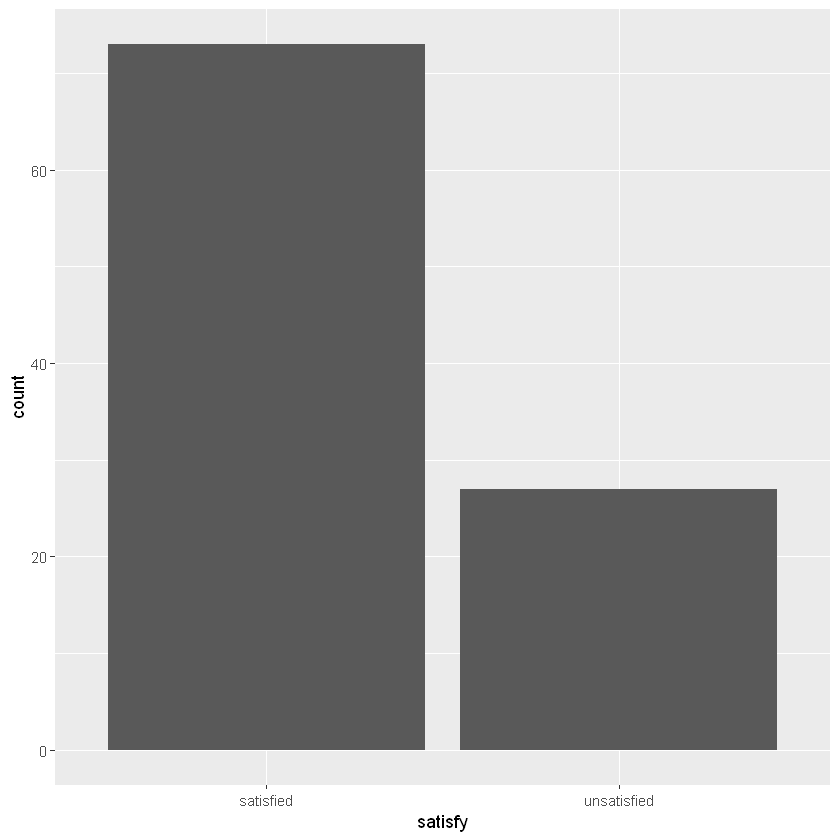

In [18]:
ggplot(data = elec, aes(x = satisfy)) + 
  geom_bar()

The observed statistic is computed as

In [19]:
p_hat <- elec %>% 
  specify(response = satisfy, success = "satisfied") %>% 
  calculate(stat = "prop")
p_hat

stat
<dbl>
0.73


Guess about statistical significance
We are looking to see if the sample proportion of 0.73 is statistically different from  
p 0 = 0.8 based on this sample. They seem to be quite close, and our sample size is not huge here ( 
n= 100 ). Let’s guess that we do not have evidence to reject the null hypothesis.

Non-traditional methods

Simulation for hypothesis test

In [20]:
set.seed(2018)
null_distn_one_prop <- elec %>% 
  specify(response = satisfy, success = "satisfied") %>% 
  hypothesize(null = "point", p = 0.8) %>% 
  generate(reps = 10000) %>% 
  calculate(stat = "prop")

Setting `type = "simulate"` in `generate()`.


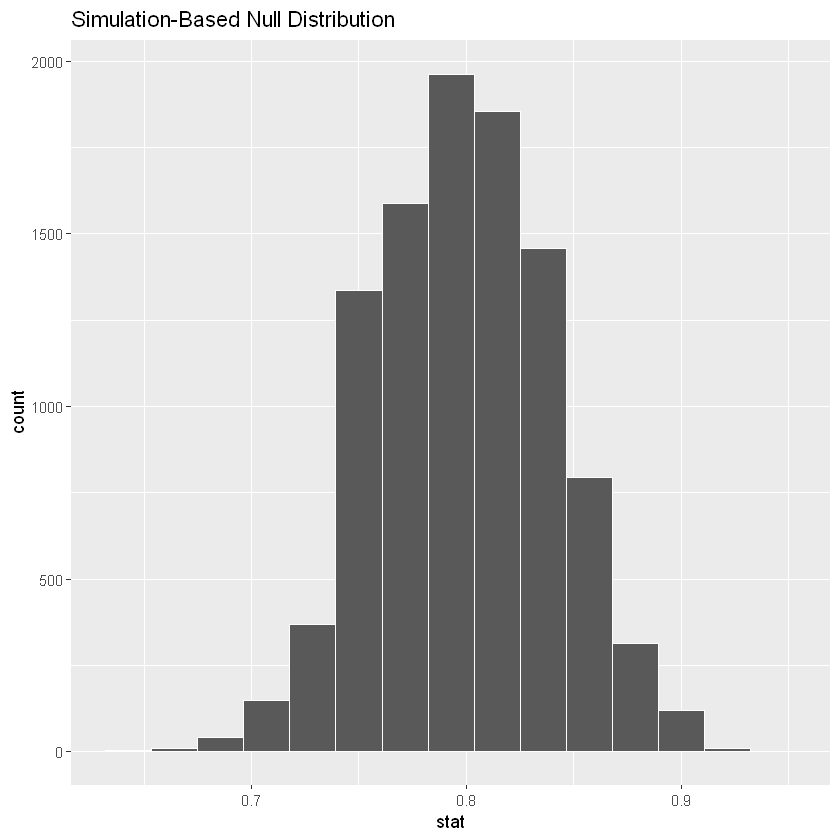

In [21]:
null_distn_one_prop %>% visualize()

We can next use this distribution to observe our  
p  -value. Recall this is a two-tailed test so we will be looking for values that are 0.8 - 0.73 = 0.07 away from 0.8 in BOTH directions for our p  -value:

Warning message:
"`visualize()` shouldn't be used to plot p-value. Arguments `obs_stat`, `obs_stat_color`, `pvalue_fill`, and `direction` are deprecated. Use `shade_p_value()` instead."

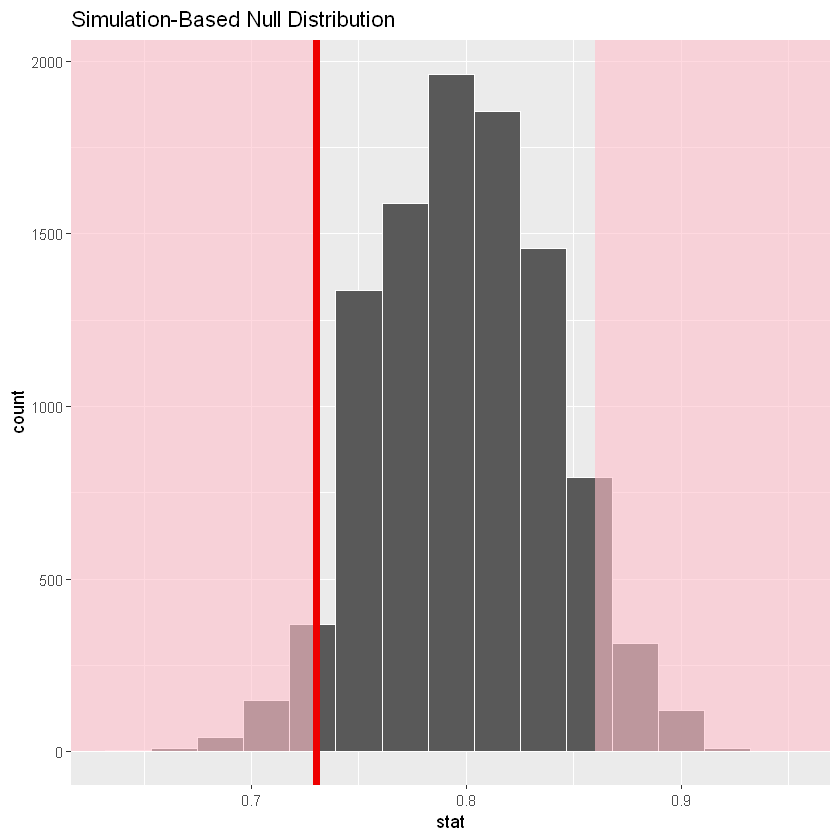

In [22]:
null_distn_one_prop %>% 
  visualize(obs_stat = p_hat, direction = "both")

Calculate  p -value

In [23]:
pvalue <- null_distn_one_prop %>% 
  get_pvalue(obs_stat = p_hat, direction = "both")
pvalue

p_value
<dbl>
0.1136


So our p  -value is 0.114 and we fail to reject the null hypothesis at the 5% level.

Bootstrapping for confidence interval

We can also create a confidence interval for the unknown population parameter  
π   using our sample data. To do so, we use bootstrapping, which involves

sampling with replacement from our original sample of 100 survey respondents and repeating this process 10,000 times,
calculating the proportion of successes for each of the 10,000 bootstrap samples created in Step 1.,
combining all of these bootstrap statistics calculated in Step 2 into a boot_distn object,
identifying the 2.5th and 97.5th percentiles of this distribution (corresponding to the 5% significance level chosen) to find a 95% confidence interval for  
π , and interpret this confidence interval in the context of the problem.

In [24]:
boot_distn_one_prop <- elec %>% 
  specify(response = satisfy, success = "satisfied") %>% 
  generate(reps = 10000) %>% 
  calculate(stat = "prop")

Setting `type = "bootstrap"` in `generate()`.


In [25]:
ci <- boot_distn_one_prop %>% 
  get_ci()
ci

2.5%,97.5%
<dbl>,<dbl>
0.64,0.81


Warning message:
"`visualize()` shouldn't be used to plot confidence interval. Arguments `endpoints`, `endpoints_color`, and `ci_fill` are deprecated. Use `shade_confidence_interval()` instead."

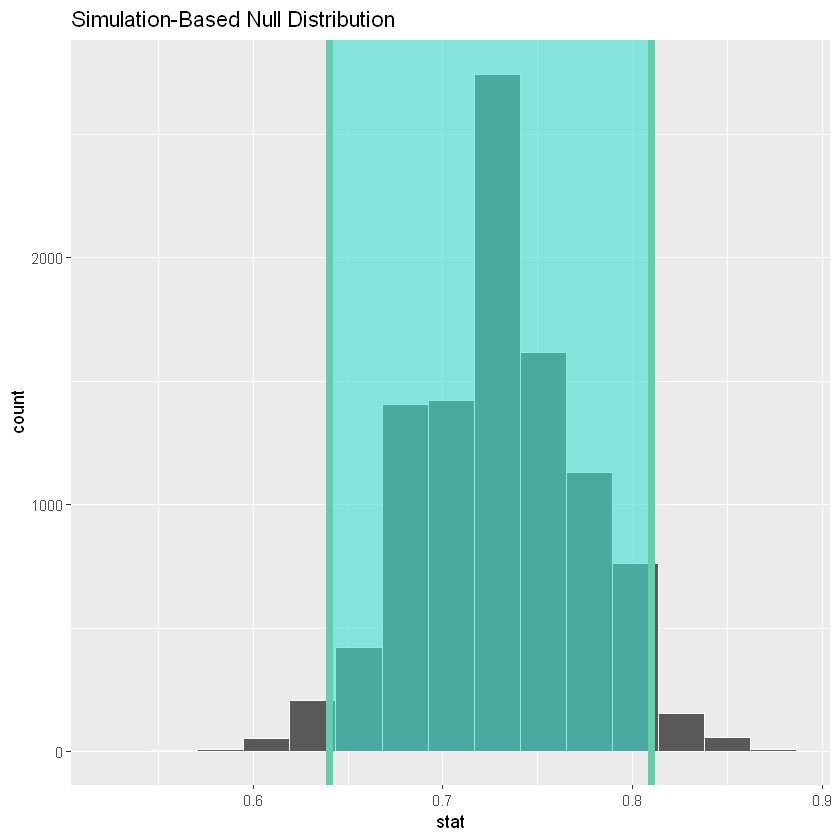

In [26]:
boot_distn_one_prop %>% 
  visualize(endpoints = ci, direction = "between")

We see that 0.80 is contained in this confidence interval as a plausible value of  
π  (the unknown population proportion). This matches with our hypothesis test results of failing to reject the null hypothesis.

Traditional methods

Remember that in order to use the shortcut (formula-based, theoretical) approach, we need to check that some conditions are met.

Independent observations: The observations are collected independently.

The cases are selected independently through random sampling so this condition is met.

Approximately normal: The number of expected successes and expected failures is at least 10.

This condition is met since 73 and 27 are both greater than 10.

Observed test statistic

In [27]:
p_hat <- 0.73
p0 <- 0.8
n <- 100
(z_obs <- (p_hat - p0) / sqrt( (p0 * (1 - p0)) / n))

[1] -1.75

We see here that the zobs value is around -1.75. Our observed sample proportion of 0.73 is 1.75 standard errors below the hypothesized parameter value of 0.8.

Visualize and compute p  -value

Warning message:
"`visualize()` shouldn't be used to plot p-value. Arguments `obs_stat`, `obs_stat_color`, `pvalue_fill`, and `direction` are deprecated. Use `shade_p_value()` instead."Warning message:
"Check to make sure the conditions have been met for the theoretical method. {infer} currently does not check these for you."

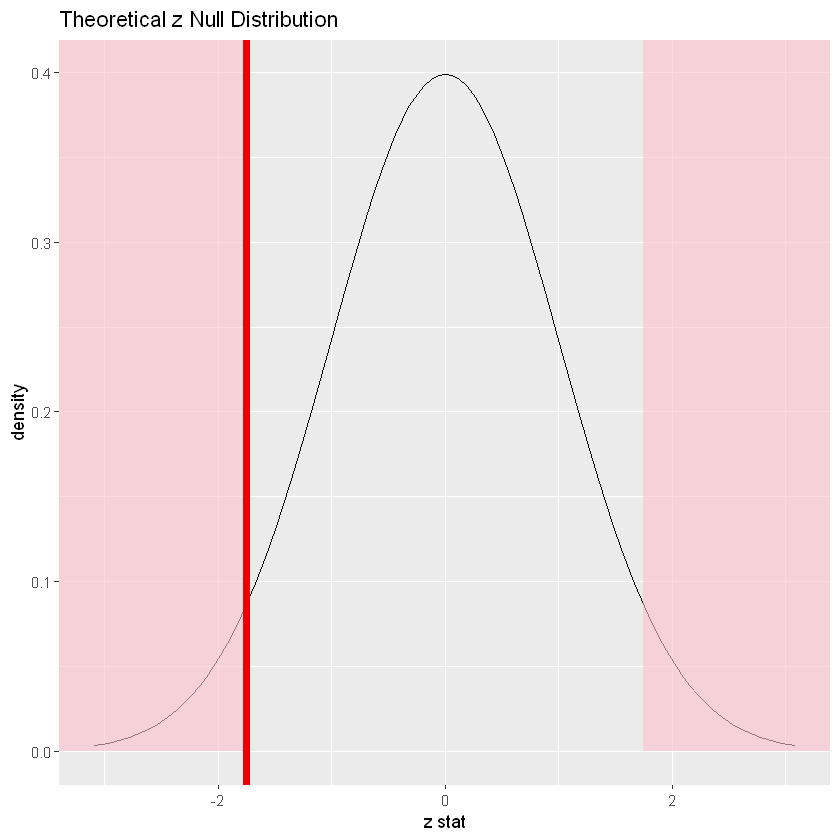

In [28]:
elec %>% 
  specify(response = satisfy, success = "satisfied") %>% 
  hypothesize(null = "point", p = 0.8) %>% 
  calculate(stat = "z") %>% 
  visualize(method = "theoretical", obs_stat = z_obs, direction = "both")

In [29]:
2 * pnorm(z_obs)

[1] 0.08011831

The p  -value—the probability of observing an zobs value of -1.75 or more extreme (in both directions) in our null distribution—is around 8%.

Note that we could also do this test directly using the prop.test function.

In [30]:
stats::prop.test(x = table(elec$satisfy),
       n = length(elec$satisfy),
       alternative = "two.sided",
       p = 0.8,
       correct = FALSE)


	1-sample proportions test without continuity correction

data:  table(elec$satisfy), null probability 0.8
X-squared = 3.0625, df = 1, p-value = 0.08012
alternative hypothesis: true p is not equal to 0.8
95 percent confidence interval:
 0.6356788 0.8073042
sample estimates:
   p 
0.73 
